In [8]:
import torch 
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [4]:
train = datasets.FashionMNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)

In [5]:
# Image Classifier Neural Network
class ImageClassifier(nn.Module): 
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)), 
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)), 
            nn.ReLU(),
            nn.Flatten(), 
            nn.Linear(64*(28-6)*(28-6), 10)  
        )

    def forward(self, x): 
        return self.model(x)

In [6]:
clf = ImageClassifier().to('cuda')
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss() 

In [7]:
if __name__ == "__main__": 
    for epoch in range(10): # train for 10 epochs
        for batch in dataset: 
            X,y = batch 
            X, y = X.to('cuda'), y.to('cuda') 
            yhat = clf(X) 
            loss = loss_fn(yhat, y) 

            # Apply backprop 
            opt.zero_grad()
            loss.backward() 
            opt.step() 

        print(f"Epoch:{epoch} loss is {loss.item()}")

Epoch:0 loss is 0.25932154059410095
Epoch:1 loss is 0.17490248382091522
Epoch:2 loss is 0.1400056630373001
Epoch:3 loss is 0.14796490967273712
Epoch:4 loss is 0.1061876118183136
Epoch:5 loss is 0.15974123775959015
Epoch:6 loss is 0.08369777351617813
Epoch:7 loss is 0.032503221184015274
Epoch:8 loss is 0.06784221529960632
Epoch:9 loss is 0.06599842011928558


8
8


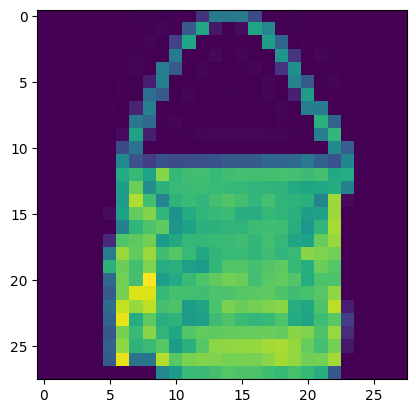

In [12]:
random = int(torch.randint(1, len(train), size=[1]).item())
img, label = train[random]
image = torch.unsqueeze(img, 1)
# print(image.shape)
plt.imshow(img.squeeze())
logit = clf(image.to("cuda"))
pred = torch.softmax(logit,1).argmax().item()
print(pred)
print(label)